# summary of non-telescoping results with minimal residual for Laplacian and Staggered Multigrid in 2D
Feb 8, 2023
Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import subprocess as sp

In [2]:
from ipywidgets import *

In [3]:
%matplotlib widget

## Modules

In [4]:
# # Load data

def f_get_data(fname): # Modified for complex field
    
    def f_conv_complex(strg):
        ''' Convert input from a+ib to python complex form'''
        arr=[np.float64(k) for k in strg.split('+i')]
        return complex(arr[0],arr[1])
    
    arr=np.loadtxt(fname,delimiter=',',dtype=str)
    
    arr_iters=arr[:,0].astype(int) # First element is iteration number
    
    arr1=np.vectorize(f_conv_complex)(arr[:,1:-1]) # Skip last element (null string) and first (iteration)
    del(arr)
    # print(arr1.shape)
    L=int(np.sqrt(arr1.shape[1])) # Get lattice size
    num=arr1.shape[0]
    # print(L)
    # a3=arr1.reshape(134,L,L) :  simple reshape doesn't do it in the correct order
    ## Reshape to 2D image
    arr2=np.empty((num,L,L),dtype=complex)
    for i in range(num): 
        for x in range(L):
            for y in range(L):
                arr2[i,x,y]=arr1[i,x+y*L]

    print(arr2.shape)
    
    return arr2

def f_rescale(arr,mean):
    a1=np.array([abs(i-mean) for i in arr])
    a1=np.abs(a1)
    return a1

# _=f_get_data(fname)
# f_rescale(arr_lst[0][:5],soln)

In [5]:
def f_get_df(file_lst):
    dict1={}
    df_data=pd.DataFrame()

    for fle in file_lst[:]:
        fname=fle
        cpy=int(fle.split('/')[-1].split('_cpy')[-1].split('.txt')[0])
        lvls=int(fle.split('/')[-1].split('_lvls')[-1].split('_')[0])
        L=int(fle.split('_L')[-1].split('_m')[0])
        blk=int(fle.split('/')[-1].split('_blk')[-1].split('_')[0])
        m=np.float64(fle.split('/')[-1].split('_m')[-1].split('_lvls')[0])
        arr=f_get_data(fname)
        res_mag=np.array([np.linalg.norm(arr[i,:,:].flatten()) for i in range(arr.shape[0])])

        iters=arr.shape[0]
        dict1={'L':L,'blk':blk,'m':m,'cpy':cpy,'lvls':lvls,'iters':iters,'res_mag_arr':res_mag,'fname':fle}

        df_data=df_data.append(dict1,ignore_index=True)

    df_data=df_data.sort_values(by=['L','m','lvls']).reset_index(drop=True)
    
    return df_data

In [8]:
# Plot modules

def f_plot_res_mag(df,L,m):
    
    df=df[df.L==L]    
    plt.figure()
    for lvl in np.unique(df.lvls.values):
        df1=df[(df.lvls==lvl) & (df.m==m)]
        y=df1.res_mag_arr.values[0]
        plt.plot(y,marker='o',linestyle='',label='lvl='+str(lvl))
    
    plt.yscale('log')
    plt.title("Magnitude of residue")
    plt.xlabel("iterations")
    plt.ylabel("Mag residue",rotation='vertical')
    plt.legend()
    plt.show()
    
    
def f_plot_iters_vs_levels(df,L):
    
    mlist=np.unique(df.m.values)

    plt.figure()
    for i,marker in zip(mlist,['*','D','H','x','d','p','1','2','h','v']):
        df1=df[df.m==i][['lvls','iters']]
        x=df1.lvls.values
        y=df1.iters
        plt.plot(x,y,label="m^2="+str(i),marker=marker)
        
    plt.xticks(df.lvls.values)
    plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel('levels')
    plt.ylabel('Iterations for convergence/3')
    plt.legend()
    plt.show()

    
def f_plot_iters_vs_mass(df,L):
    
    llist=np.unique(df.lvls.values)

    plt.figure()
    for i,marker in zip(llist,['*','D','H','x','d','p','1','2','h','v']):
        df1=df[df.lvls==i][['m','iters']]
        x=df1.m.values
        y=df1.iters
        plt.plot(x,y,label="lvl="+str(i),marker=marker)
        
    plt.xticks(df.m.values)
    plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel('mass-squared')
    plt.ylabel('Iterations for convergence/3')
    plt.legend()
    plt.show()
    
    
def f_plot_iters_vs_copies(df,L):
    
    df=df[df.L==L]
    df=df.sort_values(by=['L','cpy','lvls'])
    lvl_list=np.unique(df.lvls.values)

    plt.figure()
    for i,marker in zip(lvl_list,['*','D','H','x','d','p','1','2','h','v']):
        df1=df[df.lvls==i][['cpy','iters']]
        x=df1.cpy.values
        y=df1.iters
        plt.plot(x,y,label="lvls="+str(i),marker=marker)
        
    plt.xticks(df.cpy.values)
    # plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel('copies')
    plt.ylabel('Iterations for convergence/3')
    plt.legend()
    plt.show()


In [6]:
## Regular laplace
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/laplace_regular/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_1=f_get_df(file_lst)

## Regular wilson
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/wilson_regular/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_2=f_get_df(file_lst)

## Laplace NTL
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/laplace_ntl/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_3=f_get_df(file_lst)

## Wilson NTL
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/wilson_ntl/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_4=f_get_df(file_lst)

(135, 32, 32)
(545, 32, 32)
(1463, 32, 32)
(586, 32, 32)
(219, 32, 32)
(336, 32, 32)
(101, 32, 32)
(267, 32, 32)
(1320, 32, 32)
(55, 32, 32)
(62, 32, 32)
(5768, 32, 32)
(2147, 32, 32)
(64, 32, 32)
(129, 32, 32)
(211, 45, 45)
(78, 45, 45)
(112, 45, 45)
(801, 45, 45)
(225, 45, 45)
(322, 45, 45)
(59, 45, 45)
(1290, 45, 45)
(26, 45, 45)
(36, 45, 45)
(3592, 45, 45)
(27, 45, 45)
(26, 45, 45)
(838, 45, 45)
(26, 45, 45)
(110, 32, 32)
(134, 32, 32)
(586, 32, 32)
(130, 32, 32)
(129, 32, 32)
(77, 32, 32)
(267, 32, 32)
(45, 32, 32)
(47, 32, 32)
(45, 32, 32)
(77, 32, 32)
(77, 32, 32)
(77, 32, 32)
(48, 32, 32)
(129, 32, 32)
(198, 45, 45)
(198, 45, 45)
(225, 45, 45)
(197, 45, 45)
(198, 45, 45)
(46, 45, 45)
(59, 45, 45)
(46, 45, 45)
(49, 45, 45)
(49, 45, 45)
(45, 45, 45)
(45, 45, 45)
(46, 45, 45)
(49, 45, 45)
(27, 45, 45)


In [29]:
## Wilson NTL, L=64
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/wilson_ntl/L64/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_5=f_get_df(file_lst)

(70, 90, 90)
(121, 90, 90)
(76, 90, 90)
(75, 90, 90)
(76, 90, 90)
(123, 90, 90)
(122, 90, 90)
(124, 90, 90)
(105, 90, 90)
(75, 90, 90)
(403, 90, 90)
(413, 90, 90)
(320, 90, 90)
(422, 90, 90)
(398, 90, 90)


In [ ]:
## Wilson regular, L=64
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/wilson_regular/L64/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_6=f_get_df(file_lst)

In [27]:
## Wilson ntl, complex method, L=32
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/wilson_ntl/method2_complex/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_7=f_get_df(file_lst)

(186, 45, 45)
(191, 45, 45)
(225, 45, 45)
(190, 45, 45)
(188, 45, 45)
(66, 45, 45)
(59, 45, 45)
(59, 45, 45)
(58, 45, 45)
(59, 45, 45)
(63, 45, 45)
(64, 45, 45)
(63, 45, 45)
(57, 45, 45)
(27, 45, 45)


In [34]:
## Wilson regular, L=64
fldr='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/6_ntl-mg_new_code/3_combining_laplace_and_wilson/data/L64_complex_ntl/'
file_lst=glob.glob(fldr+'results_res_lvl*')
df_8=f_get_df(file_lst)





(70, 90, 90)
(144, 90, 90)
(77, 90, 90)
(77, 90, 90)
(77, 90, 90)
(145, 90, 90)
(144, 90, 90)
(147, 90, 90)
(105, 90, 90)
(77, 90, 90)
(330, 90, 90)
(339, 90, 90)
(320, 90, 90)
(384, 90, 90)
(327, 90, 90)


In [ ]:
cols_short=['L','m','lvls','cpy','iters']
df_5[cols_short]

In [23]:
df_2[df_2.m==-0.015][['lvls','iters']].astype(np.int64)

,lvls,iters
0,0,3592
1,1,801
2,2,225
3,3,59
4,4,27


In [26]:
df_3

,L,blk,m,cpy,lvls,iters,res_mag_arr,fname
0,32.0,2.0,-0.02,4.0,2.0,110.0,"[264.72826763752715, 3.689183931743143, 1.3877...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
1,32.0,2.0,-0.02,1.0,2.0,134.0,"[264.72826763752715, 3.70132278027488, 1.57713...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
2,32.0,2.0,-0.02,0.0,2.0,586.0,"[264.72826763752715, 3.288219139380207, 1.7445...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
3,32.0,2.0,-0.02,2.0,2.0,130.0,"[264.72826763752715, 3.6985147566289513, 1.447...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
4,32.0,2.0,-0.02,3.0,2.0,129.0,"[264.72826763752715, 3.690940441703249, 1.3935...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
5,32.0,2.0,-0.02,0.0,3.0,267.0,"[264.72826763752715, 3.094106893900951, 1.5224...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
6,32.0,2.0,-0.02,1.0,3.0,45.0,"[264.72826763752715, 3.145492303599277, 1.4338...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
7,32.0,2.0,-0.02,3.0,3.0,47.0,"[264.72826763752715, 3.1435474830315537, 1.397...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
8,32.0,2.0,-0.02,2.0,3.0,45.0,"[264.72826763752715, 3.1446870972275365, 1.414...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
9,32.0,2.0,-0.02,4.0,3.0,48.0,"[264.72826763752715, 3.1420494032544757, 1.394...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...


In [17]:
df_1.convert_dtypes().dtypes

L                Int64
blk              Int64
m              Float64
cpy              Int64
lvls             Int64
iters            Int64
res_mag_arr     object
fname           string
dtype: object

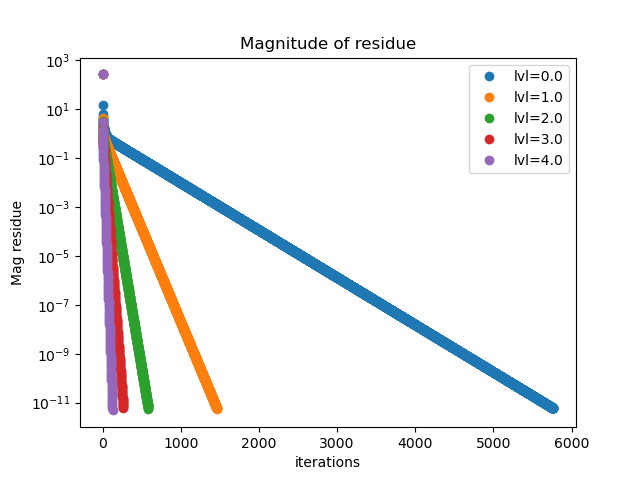

In [14]:
f_plot_res_mag(df_1,L=32,m=-0.02)

In [ ]:
f_plot_iters_vs_levels(df_2,32)

In [ ]:
f_plot_iters_vs_mass(df_2,32)

### Plots for non-telescoping

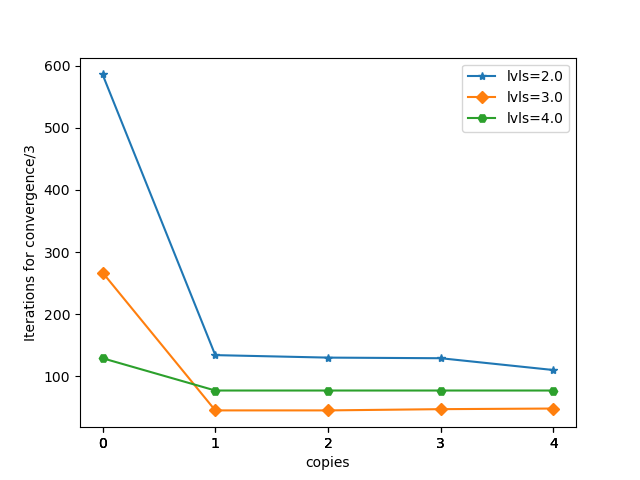

In [28]:
f_plot_iters_vs_copies(df_3,32)

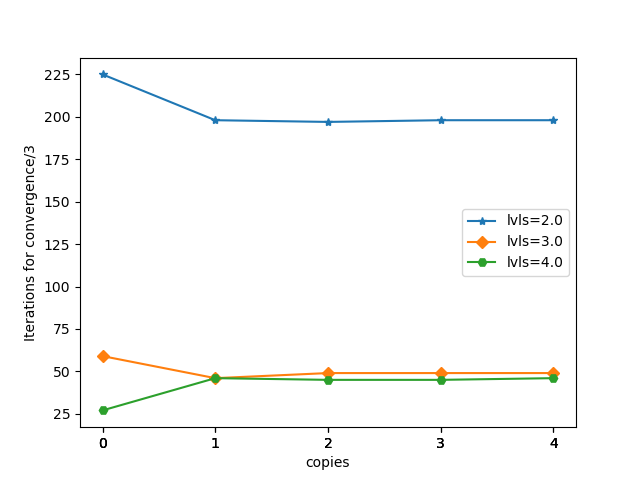

In [33]:
f_plot_iters_vs_copies(df_4,32)

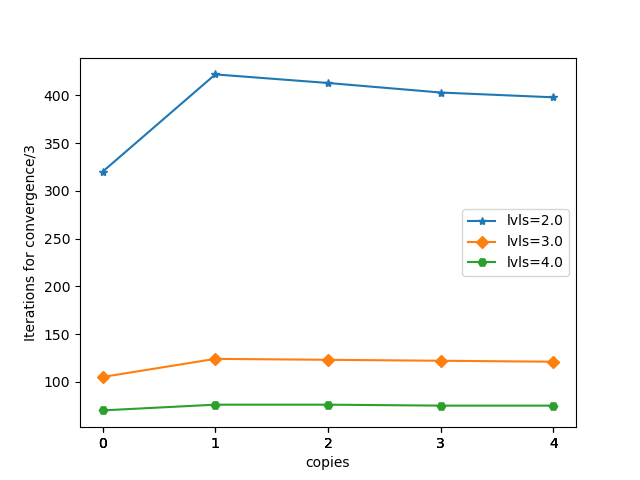

In [31]:
f_plot_iters_vs_copies(df_5,64)

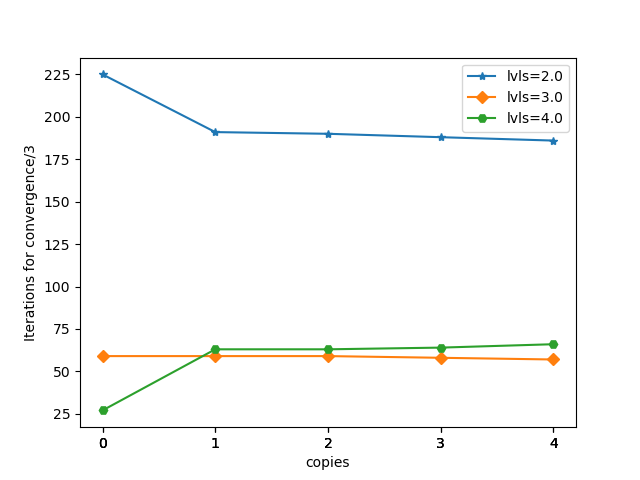

In [32]:
f_plot_iters_vs_copies(df_7,32)

In [ ]:
f_plot_iters_vs_copies(df_5,64)

In [ ]:
f_plot_iters_vs_copies(df_7,32)

In [35]:
df_8

,L,blk,m,cpy,lvls,iters,res_mag_arr,fname
0,64.0,2.0,-0.015,3.0,2.0,330.0,"[431.46956602239385, 38.61520961984394, 13.285...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
1,64.0,2.0,-0.015,2.0,2.0,339.0,"[431.46956602239385, 38.522891807921035, 13.52...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
2,64.0,2.0,-0.015,0.0,2.0,320.0,"[431.46956602239385, 35.031806241180334, 10.75...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
3,64.0,2.0,-0.015,1.0,2.0,384.0,"[431.46956602239385, 38.50037016118586, 13.809...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
4,64.0,2.0,-0.015,4.0,2.0,327.0,"[431.46956602239385, 38.59712664384342, 13.205...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
5,64.0,2.0,-0.015,4.0,3.0,144.0,"[431.46956602239385, 34.08318204283326, 8.5114...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
6,64.0,2.0,-0.015,2.0,3.0,145.0,"[431.46956602239385, 34.05451716689608, 8.4638...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
7,64.0,2.0,-0.015,3.0,3.0,144.0,"[431.46956602239385, 34.057468693639464, 8.462...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
8,64.0,2.0,-0.015,1.0,3.0,147.0,"[431.46956602239385, 34.03757069491398, 8.4306...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...
9,64.0,2.0,-0.015,0.0,3.0,105.0,"[431.46956602239385, 33.59619061643323, 7.0352...",/Users/vayyar/Desktop/work/PROJECTS/Multigrid/...


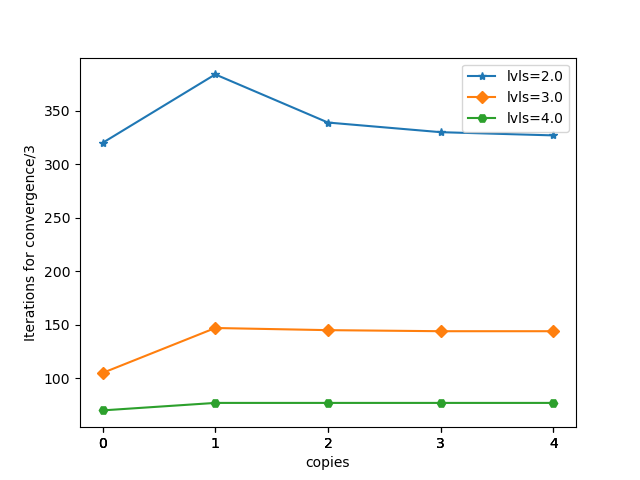

In [36]:
f_plot_iters_vs_copies(df_8,64)

In [ ]:
df_3[cols_short]

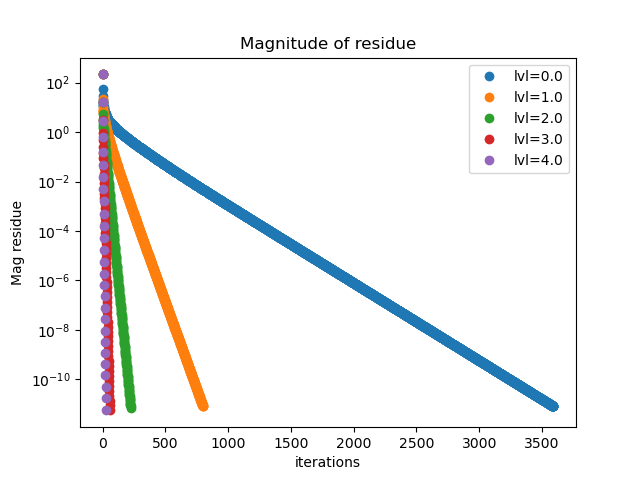

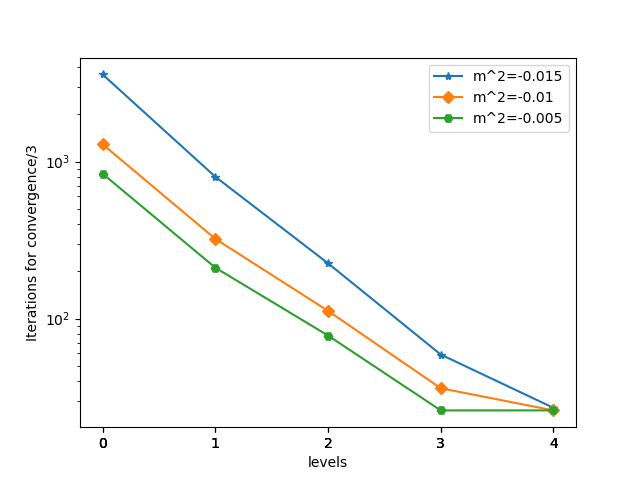

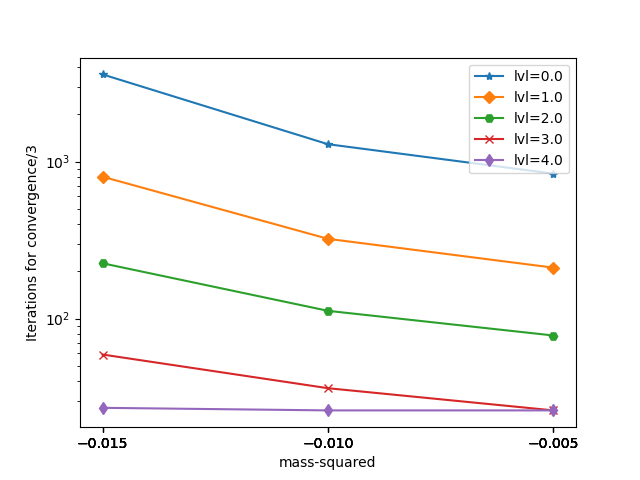

In [20]:
df=df_2.copy()
f_plot_res_mag(df,L=32,m=-0.015)
f_plot_iters_vs_levels(df,64)
f_plot_iters_vs_mass(df,64)